In [85]:
import numpy as np 
import pandas as pd  
import cv2
import matplotlib.pyplot as plt 
import os
print(os.listdir("../Image Classification with CNN for Malaria Data/cell_images"))
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

['Parasitized', 'Uninfected']


In [86]:
train_data=os.listdir("../Image Classification with CNN for Malaria Data/cell_images/") 


parasitized_data = os.listdir("../Image Classification with CNN for Malaria Data/cell_images/Parasitized/") #Parazitli örnek
print(parasitized_data[:10]) 

uninfected_data = os.listdir("../Image Classification with CNN for Malaria Data/cell_images/Uninfected/")#Parazitsiz temiz örnek

print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


# Parazitli Veriler

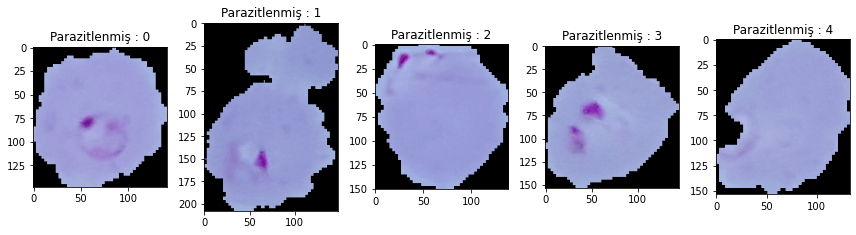

In [87]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../Image Classification with CNN for Malaria Data/cell_images/Parasitized" + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parazitlenmiş : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

# Parazitsiz Temiz Veriler

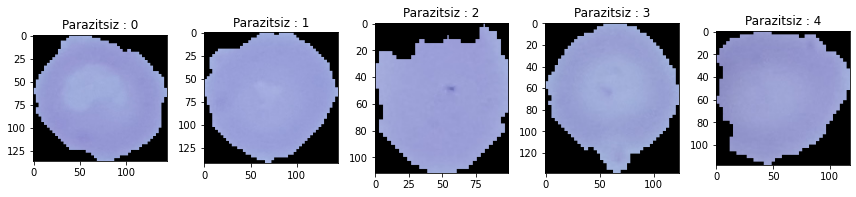

In [88]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../Image Classification with CNN for Malaria Data/cell_images/Uninfected" + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Parazitsiz : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

In [74]:
#Yukarıdaki iki görsel arasında enfekte olan ve olmayan arasında ki farklar açıkca görülmektedir.

In [105]:
import pathlib
import tensorflow as tf
from tensorflow.keras import layers

In [106]:
data_dir = pathlib.Path("../Image Classification with CNN for Malaria Data/cell_images/")

In [107]:
batch_size = 128
img_height = 150
img_width = 150

In [108]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [109]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [110]:
gruplama = train_ds.class_names
print(gruplama)

['Parasitized', 'Uninfected']


## Yüksek veri seti ile çalışırken cache te tutulan bilgilerin sürekli tekrar edilmemesi ve eğitim sırasında model ile çakışmaması için aşağıdaki AUTOTUNE fonksiyonunu kullanıyoruz.

In [111]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)   

In [112]:
num_classes = len(gruplama)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 32)       

In [114]:
tf.keras.backend.clear_session()  #cache te tutulan bilgileri temizliyoruz

In [115]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs, verbose=1)

Epoch 1/10
173/173 [==============================] - 248s 1s/step - loss: 0.6212 - accuracy: 0.6565 - val_loss: 0.4487 - val_accuracy: 0.8182
Epoch 2/10
173/173 [==============================] - 224s 1s/step - loss: 0.2823 - accuracy: 0.8969 - val_loss: 0.2225 - val_accuracy: 0.9340
Epoch 3/10
173/173 [==============================] - 221s 1s/step - loss: 0.1943 - accuracy: 0.9328 - val_loss: 0.1925 - val_accuracy: 0.9258
Epoch 4/10
173/173 [==============================] - 221s 1s/step - loss: 0.1638 - accuracy: 0.9438 - val_loss: 0.1639 - val_accuracy: 0.9461
Epoch 5/10
173/173 [==============================] - 224s 1s/step - loss: 0.1461 - accuracy: 0.9523 - val_loss: 0.1520 - val_accuracy: 0.9490
Epoch 6/10
173/173 [==============================] - 221s 1s/step - loss: 0.1337 - accuracy: 0.9551 - val_loss: 0.1465 - val_accuracy: 0.9508
Epoch 7/10
173/173 [==============================] - 219s 1s/step - loss: 0.1231 - accuracy: 0.9589 - val_loss: 0.1460 - val_accuracy: 0.9521

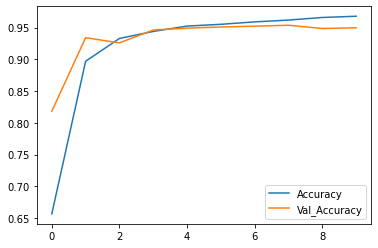

In [124]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend();

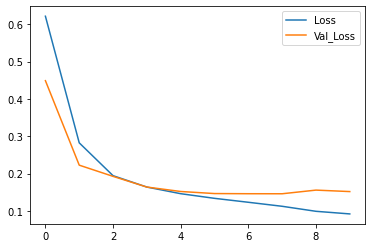

In [125]:
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="Val_Loss")
plt.legend();